The average minimum price per meal in United States of America is: 64€.
The average maximum price per meal in United States of America is: 127€.

The Michelin rastaurant selected for you is: Kanoyama, which is located in the city of New York. It offers Japanese meals and it's rated with 1 star/s. Minimum price per meal: 45€. Maximum price per meal: 68€. You can get more information by visiting https://guide.michelin.com/us/en/new-york-state/new-york/restaurant/kanoyama

If you want to see a movie afterwards, you can go to  Cinemas Village East, which is located just 42 meters from the restaurant on 2nd Ave (at E 12th St), New York, NY 10003, United States.


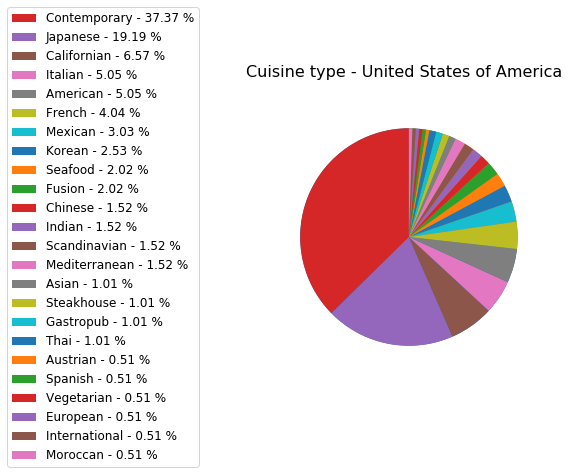

In [119]:
# Importing packages and loading env:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
# import json
# import requests
# from bs4 import BeautifulSoup 
# import os
# from dotenv import load_dotenv
# load_dotenv()
# from src.api import exchangerate_api_request
# from src.api import battuta_request_authorized
from src.api import foursquare_request_venues_authorized
from src.api import foursquare_menu_hours_authorized
# from src.api import foursquare_get_id_authorized
from src.webscraping import get_soup
# from src.clean import resub_list
from src.datavisualization import pie_chart_stars
from src.datavisualization import pie_chart_cuisine

#..............................................................................................

# Importing the data set:
df_final = pd.read_csv('./input/cleaned_enriched_df.csv')

#..............................................................................................

# Filtering:

max_price = 100
state = 'United States of America'

accepted_states = sorted(list(set(df_final['state'])))

if state in accepted_states:
    df_filtered = df_final[df_final['state'] == state]
    
    # State statistics:
    print('The average minimum price per meal in {} is: {}€.'.format(state, round(df_filtered['min_price_EUR'].mean())))
    print('The average maximum price per meal in {} is: {}€.'.format(state, round(df_filtered['max_price_EUR'].mean())))
    # display(df_filtered.groupby(['stars', 'cuisine'])['min_price_EUR','max_price_EUR'].mean().astype(int).reset_index())
    # display(df_filtered.groupby(['stars', 'cuisine']).agg({'stars':['size'],'min_price_EUR':[np.mean],'max_price_EUR':[np.mean]}).reset_index())

    # Data visualization
    values = [e for e in df_filtered['stars'].value_counts()]
    labels = df_filtered['stars'].value_counts().index.tolist()
    pie_chart_stars(values,labels,state)
    values = [e for e in df_filtered['cuisine'].value_counts()]
    labels = df_filtered['cuisine'].value_counts().index.tolist()
    pie_chart_cuisine(values,labels,state)
      
    # Choosing one restaurant from the available ones:    
    df_filtered_by_price = df_filtered[df_filtered['max_price_EUR'] <= max_price]
    if len(df_filtered_by_price) > 0:
        rowindex = random.choice([e for e in range(len(df_filtered_by_price))])
        selected_restaurant = df_filtered_by_price.iloc[[rowindex]]
        print("\nThe Michelin rastaurant selected for you is: {}, which is located in the city of {}. It offers {} meals and it's rated with {} star/s. Minimum price per meal: {}€. Maximum price per meal: {}€. You can get more information by visiting {}".format(
        selected_restaurant.values[0][0],selected_restaurant.values[0][3],selected_restaurant.values[0][6],
        selected_restaurant.values[0][7],selected_restaurant.values[0][8],selected_restaurant.values[0][9],
        selected_restaurant.values[0][10]))
        # Web scraping https://guide.michelin.com to get some services:
        # soup = get_soup(selected_restaurant.values[0][10])
        # services = soup.select('.restaurant-details__services--content')
        # xr = re.compile('(\s){2}')
        # services_rest = [(xr.sub('',e.text)[3:]).strip() for e in services]
        # print('\nServices offered by the restaurant: {}.'.format(' / '.join(services_rest))) 
        # foursquare API to get opening hours and menu:
        # foursquare_id: selected_restaurant.values[0][11]
        # data_time = foursquare_menu_hours_authorized('hours',selected_restaurant.values[0][11])
        # if len(data_time['response']['hours'])>0:
            # print('\nOpening days: {}.'.format(str(data_time['response']['hours']['timeframes'][0]['days']).strip('[|]')))
            # print('Opening hours: from {}h to {}h.'.format(
            # data_time['response']['hours']['timeframes'][0]['open'][0]['start'][:2],
            # data_time['response']['hours']['timeframes'][0]['open'][0]['end'][:2]))
        # data_menu = foursquare_menu_hours_authorized('menu',selected_restaurant.values[0][11])
        # if data_menu:
            # print('\n', data_menu['response'])
        # Do you want to see a movie afterwards?    
        latitude = selected_restaurant.values[0][4]
        longitude = selected_restaurant.values[0][5]
        data = foursquare_request_venues_authorized('explore', latitude, longitude, 'cinema')
        print('\nIf you want to see a movie afterwards, you can go to {}, which is located just {} meters from the restaurant on {}.'.format(
        data['response']['groups'][0]['items'][0]['venue']['name'][4:],
        data['response']['groups'][0]['items'][0]['venue']['location']['distance'],
        ', '.join(data['response']['groups'][0]['items'][0]['venue']['location']['formattedAddress'])[4:]))       
    elif len(df_filtered_by_price) == 0:
        raise ValueError('There is no Michelin restaurant in {} in which you can eat for less than {} euro/s.'.format(state, max_price))
else:
    raise NameError('Accepted states: {}.'.format(', '.join(accepted_states)))



In [72]:
print(  'Opening days: {}.'.format(str(data['response']['hours']['timeframes'][0]['days']).strip('[|]')))
print('Opening hours: from {}h to {}h.'.format(data['response']['hours']['timeframes'][0]['open'][0]['start'][:2],
data['response']['hours']['timeframes'][0]['open'][0]['end'][:2]))

Opening days: 1, 2, 3, 4, 5, 6, 7.
Opening hours: from 11h to 23h.


In [116]:
print('If you want to see a movie afterwards, you can go to {}, which is located just {} meters from the restaurant on {}.'.format(
data['response']['groups'][0]['items'][0]['venue']['name'][4:],
data['response']['groups'][0]['items'][0]['venue']['location']['distance'],
', '.join(data['response']['groups'][0]['items'][0]['venue']['location']['formattedAddress'])[4:]))

If you want to see a movie afterwards, you can go to Van Ness Movie Theatre, which is located just 402 meters from the restaurant on Van Ness Avenue (Hayes Street), San Francisco, CA 94102, United States.
